# Homework11_2 CLUSTERING BUSINESS by xy1002

In [1]:
import pandas as pd
import zipfile
import os
import pylab as pl
from geopandas import GeoDataFrame
#import wget
import numpy as np
from sklearn.cluster import KMeans

%pylab inline

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

Populating the interactive namespace from numpy and matplotlib


## 1. get and prep your data.
### Download data

In [2]:
for y in range(94, 100):
     if not os.path.isfile(os.getenv('PUIDATA') + '/HW11/' + "zbp{}totals.zip".format(y)):
            os.system('curl -O ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp{}totals.zip'.format(y))
            os.system('mv zbp{}totals.zip '.format(y) + os.getenv("PUIDATA") + '/HW11') 
            print('zbp{}totals.zip'.format(y) + ' done!')
      

In [3]:
for y in range(0, 2):
     if not os.path.isfile(os.getenv('PUIDATA') + '/HW11/' + "zbp0{}totals.zip".format(y)):
            os.system('curl -O ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp0{}totals.zip'.format(y))
            os.system('mv zbp0{}totals.zip '.format(y) + os.getenv("PUIDATA") + '/HW11') 
            print('zbp0{}totals.zip'.format(y) + ' done!')

In [4]:
for y in range(2, 10):
     if not os.path.isfile(os.getenv('PUIDATA') + '/HW11/' + "zbp0{}totals.zip".format(y)):
            os.system('curl -O ftp://ftp.census.gov/econ200{}/CBP_CSV/zbp0{}totals.zip'.format(y,y))
            os.system('mv zbp0{}totals.zip '.format(y) + os.getenv("PUIDATA") + '/HW11') 
            print('zbp0{}totals.zip'.format(y) + ' done!')

In [5]:
for y in range(10, 16):
     if not os.path.isfile(os.getenv('PUIDATA') + '/HW11/' + "zbp{}totals.zip".format(y)):
            os.system('curl -O ftp://ftp.census.gov/econ20{}/CBP_CSV/zbp{}totals.zip'.format(y,y))
            os.system('mv zbp{}totals.zip '.format(y) + os.getenv("PUIDATA") + '/HW11') 
            print('zbp{}totals.zip'.format(y) + ' done!')

zbp15totals.zip done!


In [26]:
if not os.path.isfile(os.getenv('PUIDATA') + '/HW11/' + 'nyc-zip-code-tabulation-areas-polygons.geojson'):
    !curl -O "https://github.com/fedhere/PUI2016_fb55/blob/master/HW11_fb55/\
    nyc-zip-code-tabulation-areas-polygons.geojson"
    os.system('mv nyc-zip-code-tabulation-areas-polygons.geojson ' + os.getenv("PUIDATA") + '/HW11') 
path = os.getenv('PUIDATA') + '/HW11/' + 'nyc-zip-code-tabulation-areas-polygons.geojson'
zc_shape = GeoDataFrame.from_file(path)
zc_shape.rename(columns={'postalCode': 'zip'}, inplace=True) 
zc_shape.head()


,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry,zip
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,2.016328e+07,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,2.260653e+07,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6.269333e+06,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040
3,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,4.941836e+07,35932.810639,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,11426
4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,6.938587e+07,38693.565676,Queens,POLYGON ((-73.81088634744755 40.72717187575918...,11365


In [7]:
zc_data = zc_shape[['geometry','zip']]
zc_data.head()

,geometry,zip
0,POLYGON ((-73.86942457284175 40.74915687096787...,11372
1,POLYGON ((-73.71068374074007 40.75004039450917...,11004
2,POLYGON ((-73.70098278625547 40.73889569923034...,11040
3,POLYGON ((-73.72270447144122 40.75373371438336...,11426
4,POLYGON ((-73.81088634744755 40.72717187575918...,11365


In [8]:
for y in range(1994, 2015):
    fname = "zbp{}totals.zip".format(str(y)[2:])
    zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/HW11/' + fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    df.rename(columns={'ZIP': 'zip', 'EST': 'est_{}'.format(str(y)[2:]), \
                       'est': 'est_{}'.format(str(y)[2:])}, inplace=True)
    df['zip'] = df['zip'].astype(str)
    zc_data = pd.merge(zc_data, df[['zip','est_{}'.format(str(y)[2:])]], on = 'zip') 
zc_data.head()


,geometry,zip,est_94,est_95,est_96,est_97,est_98,est_99,est_00,est_01,...,est_05,est_06,est_07,est_08,est_09,est_10,est_11,est_12,est_13,est_14
0,POLYGON ((-73.86942457284175 40.74915687096787...,11372,1229,1236,1292,1309,1351,1376,1409,1408,...,1539,1527,1545,1538,1572,1629,1647,1724,1759,1768
1,POLYGON ((-73.71068374074007 40.75004039450917...,11004,194,188,176,192,194,186,189,204,...,225,226,238,227,233,229,222,241,241,250
2,POLYGON ((-73.70098278625547 40.73889569923034...,11040,1422,1414,1335,1344,1344,1350,1350,1341,...,1441,1454,1488,1503,1475,1494,1488,1510,1539,1534
3,POLYGON ((-73.72270447144122 40.75373371438336...,11426,326,219,209,198,203,217,213,217,...,226,226,228,226,237,248,256,266,258,260
4,POLYGON ((-73.81088634744755 40.72717187575918...,11365,492,476,483,522,509,519,553,574,...,604,608,617,616,628,643,677,679,714,731


### Whitening data

In [9]:
zc_data.shape 
#should be (Nzipcodes, Ntimestamps)

(243, 23)

In [10]:
#Nomalized data by year, substracted by mean and then devided by standard deviation. 
zc_dataN = zc_data
for y in range(1994, 2015):
    zc_dataN['est_{}'.format(str(y)[2:])] = (zc_dataN['est_{}'.format(str(y)[2:])]\
                                             - zc_dataN['est_{}'.format(str(y)[2:])].mean())/\
    zc_dataN['est_{}'.format(str(y)[2:])].std()    
zc_dataN.head()

,geometry,zip,est_94,est_95,est_96,est_97,est_98,est_99,est_00,est_01,...,est_05,est_06,est_07,est_08,est_09,est_10,est_11,est_12,est_13,est_14
0,POLYGON ((-73.86942457284175 40.74915687096787...,11372,0.387339,0.370872,0.408935,0.397681,0.419591,0.435325,0.442607,0.439446,...,0.517137,0.500185,0.518966,0.510172,0.541794,0.577428,0.580886,0.625242,0.633057,0.622950
1,POLYGON ((-73.71068374074007 40.75004039450917...,11004,-0.518384,-0.524546,-0.542303,-0.534565,-0.537402,-0.550076,-0.549884,-0.536192,...,-0.557021,-0.556791,-0.555745,-0.570798,-0.576865,-0.590800,-0.603589,-0.595318,-0.604500,-0.604699
2,POLYGON ((-73.70098278625547 40.73889569923034...,11040,0.556233,0.522957,0.445586,0.426892,0.413801,0.413796,0.394610,0.385154,...,0.437024,0.440877,0.472097,0.481314,0.460756,0.464778,0.448724,0.449112,0.453701,0.433708
3,POLYGON ((-73.72270447144122 40.75373371438336...,11426,-0.402871,-0.498059,-0.514175,-0.529557,-0.529957,-0.524406,-0.530360,-0.525658,...,-0.556204,-0.556791,-0.563968,-0.571623,-0.573523,-0.574946,-0.575328,-0.574742,-0.590640,-0.596611
4,POLYGON ((-73.81088634744755 40.72717187575918...,11365,-0.257606,-0.278477,-0.280628,-0.259148,-0.276855,-0.274329,-0.253764,-0.236370,...,-0.247199,-0.246442,-0.244104,-0.250052,-0.246865,-0.245338,-0.225388,-0.234829,-0.218884,-0.215701


## 2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means in **a few** clusters (as discussed there is no real good, sound way to decide what a good number is here. try a few options, keeping in mind a few is more than a couple, but i recommand you stay within the single digit numbers)

### Kmeans (I used 5 and 8 clusters)

In [11]:
zc_dataC = zc_dataN

In [12]:
km_5 = KMeans(5).fit(zc_dataC.iloc[:,2:])

In [13]:
km_8 = KMeans(8).fit(zc_dataC.iloc[:,2:])


## 3. plot the cluster centers (if you used K means those are the means of the clusters). you can plot for example the cluster centers overlayed on each time series (using the alpha channel to control the opacity in the plot may be helpful here).

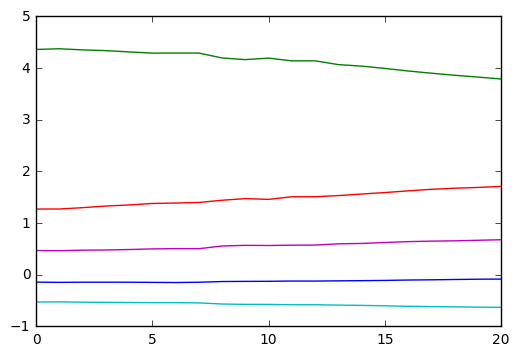

In [14]:
pl.plot(km_5.cluster_centers_.T)

### Figure 1: K-means (5 cluster plot) clusting 

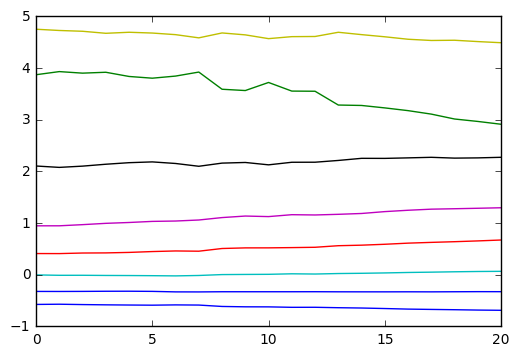

In [15]:
pl.plot(km_8.cluster_centers_.T)

### Figure 2: K-means (8 clusters plot) clusting


## 4. Use another clustering algorithm (Agglomerative Clustering)

In [16]:
from sklearn.cluster import AgglomerativeClustering


In [17]:
ac_5 = AgglomerativeClustering(n_clusters = 5).fit(zc_dataC.iloc[:,2:])


In [18]:
ac_8 = AgglomerativeClustering(n_clusters = 8).fit(zc_dataC.iloc[:,2:])


## 5. overlay your data on a NYC map: you can use shapefiles for the zip codes and different colors for different clusters
## &
## 6. Compare the results of the 2 algorithms

In [19]:
zc_dataC['kmeans_5'] = km_5.labels_
zc_dataC['kmeans_8'] = km_8.labels_
zc_dataC['ac_5'] = ac_5.labels_
zc_dataC['ac_8'] = ac_8.labels_

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


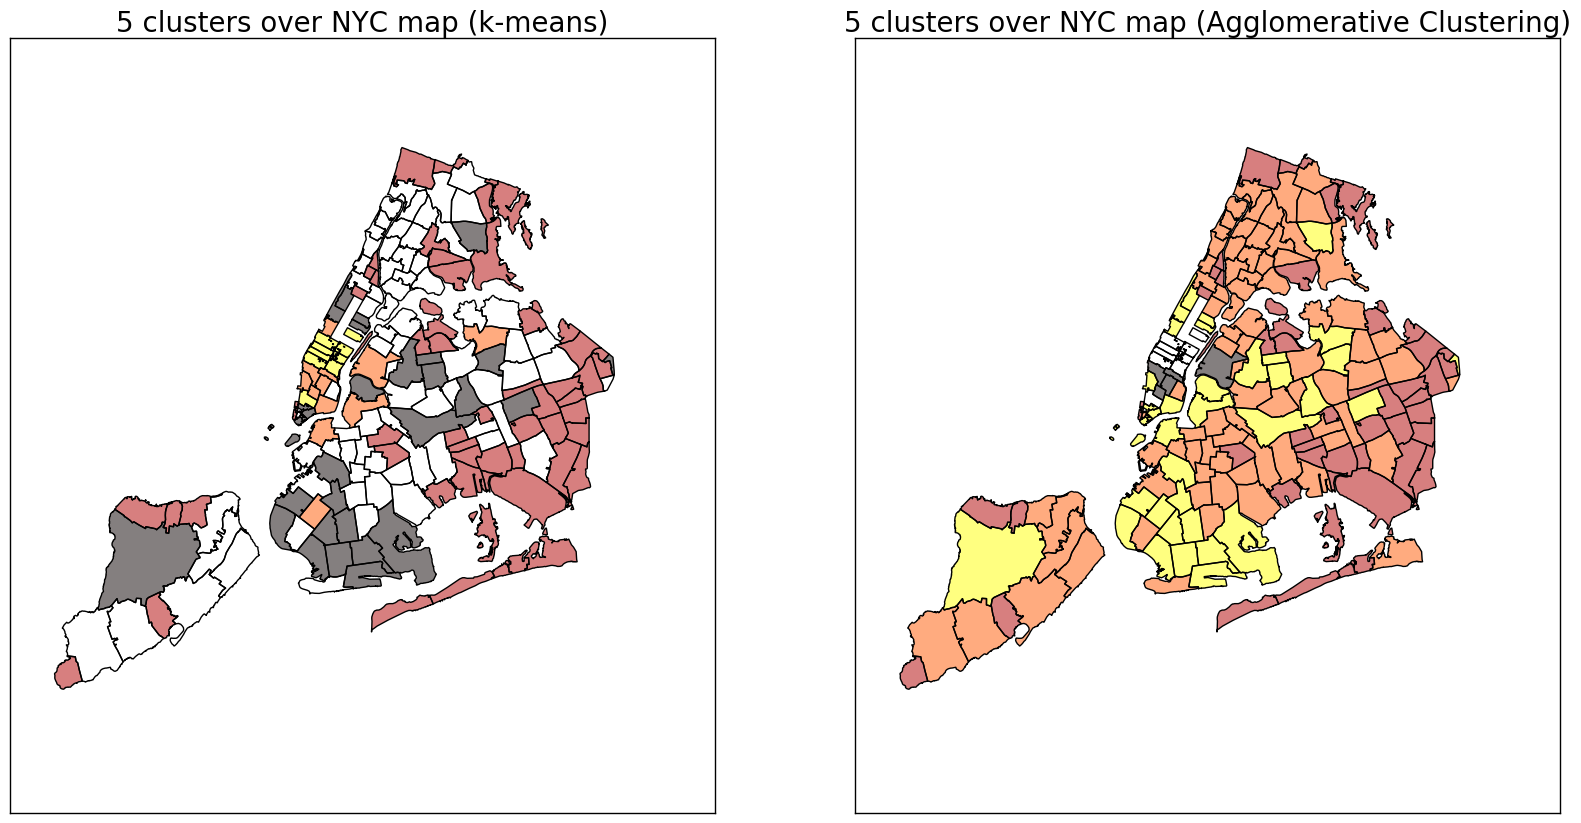

In [20]:
f, ax = plt.subplots(figsize = (20,10))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
zc_dataC.plot(column = 'kmeans_5', colormap = 'hot_r', ax = ax1)
zc_dataC.plot(column = 'ac_5', colormap = 'hot_r', ax = ax2)
ax1.set_title("5 clusters over NYC map (k-means)", fontsize = 20)
ax2.set_title("5 clusters over NYC map (Agglomerative Clustering)", fontsize = 20)

## Figure 3: 5 clusters map (K-means vs. Agglomerative Clustering)

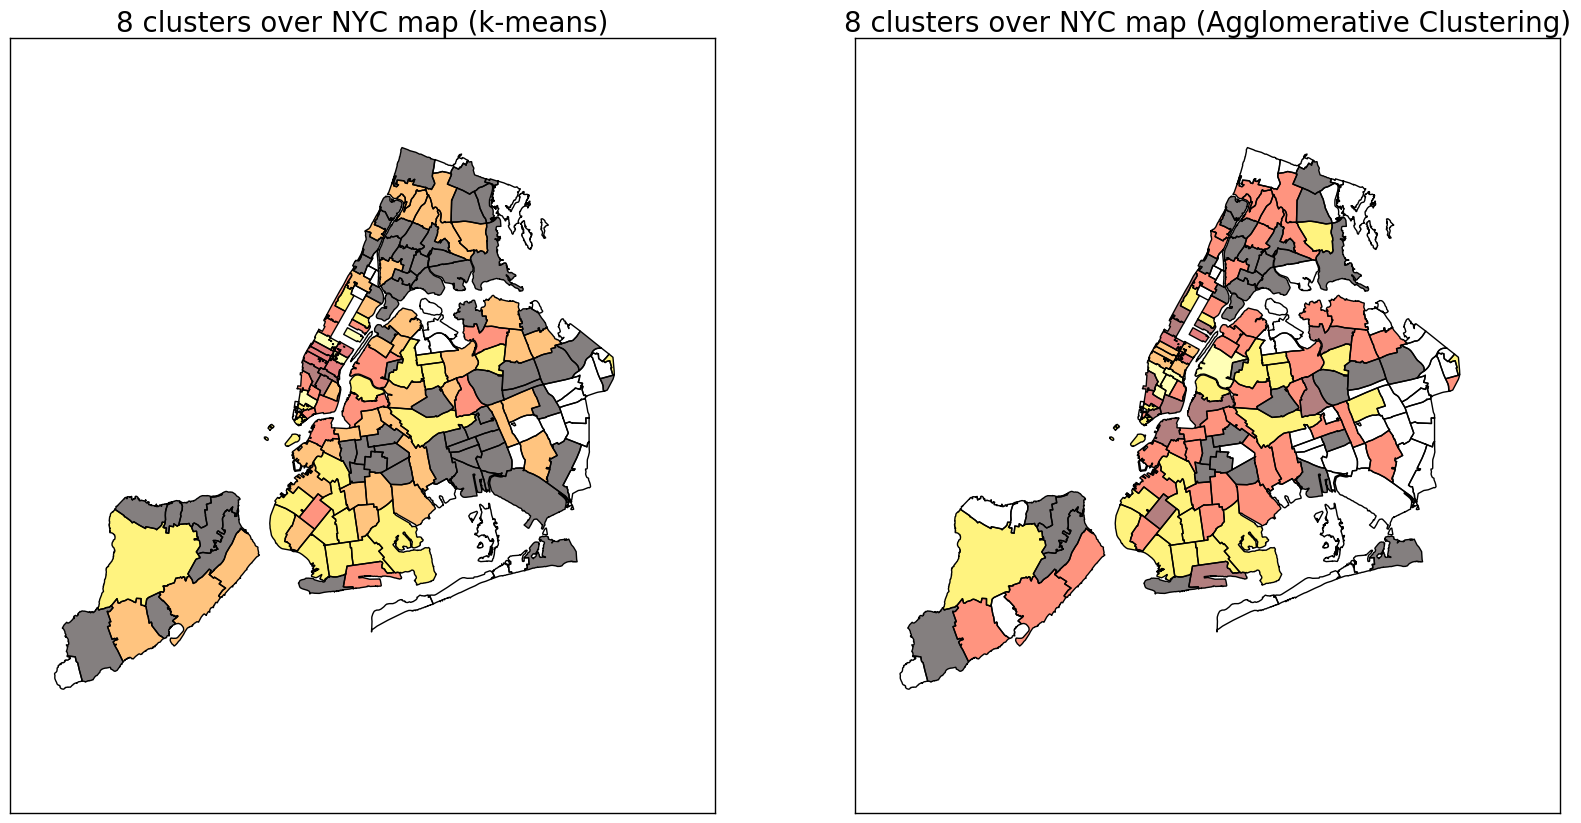

In [21]:
f, ax = plt.subplots(figsize = (20,10))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
zc_dataC.plot(column = 'kmeans_8', colormap = 'hot_r', ax = ax1)
zc_dataC.plot(column = 'ac_8', colormap = 'hot_r', ax = ax2)
ax1.set_title("8 clusters over NYC map (k-means)", fontsize = 20)
ax2.set_title("8 clusters over NYC map (Agglomerative Clustering)", fontsize = 20)

## Figure 4: 8 clusters map plot (K-means vs. Agglomerative Clustering)

## 7. attempt an interpretation. 

### The result from two algorithms are pretty similar with each other. 